In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df=pd.read_csv("Suicides in India 2001-2012.csv")

In [14]:
df.head(10)

State  Year Type_code                                     Type  \
0  A & N Islands  2001    Causes                       Illness (Aids/STD)   
1  A & N Islands  2001    Causes  Bankruptcy or Sudden change in Economic   
2  A & N Islands  2001    Causes  Cancellation/Non-Settlement of Marriage   
3  A & N Islands  2001    Causes        Physical Abuse (Rape/Incest Etc.)   
4  A & N Islands  2001    Causes                            Dowry Dispute   
5  A & N Islands  2001    Causes                          Family Problems   
6  A & N Islands  2001    Causes      Ideological Causes/Hero Worshipping   
7  A & N Islands  2001    Causes                  Other Prolonged Illness   
8  A & N Islands  2001    Causes                         Property Dispute   
9  A & N Islands  2001    Causes                Fall in Social Reputation   

   Gender Age_group  Total  
0  Female      0-14      0  
1  Female      0-14      0  
2  Female      0-14      0  
3  Female      0-14      0  
4  Female      0-14      0  
5  Female      0-14      0  
6  Female      0-14      0  
7  Female      0-14      0  
8  Female      0-14      0  
9  Female      0-14      0

In [15]:
df["Type_code"].unique()

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

In [5]:
df.shape

(237519, 7)

In [6]:
df.size

1662633

In [7]:
df.isna().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [9]:
#no null values in the dataset

In [8]:
df['State'].value_counts()

Madhya Pradesh       6792
Maharashtra          6792
Karnataka            6792
Odisha               6791
Andhra Pradesh       6791
Rajasthan            6791
Bihar                6790
Chhattisgarh         6790
Haryana              6790
Kerala               6788
Uttar Pradesh        6787
Assam                6786
Tamil Nadu           6786
Gujarat              6786
Jharkhand            6785
Tripura              6782
Delhi (Ut)           6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Total (All India)     312
Total (States)        312
Total (Uts)           312
Name: State,

1. We are able to see that there are certain values such as Total(All India),Total(States),Total(Uts)

2. These values can be removed from the dataset before further analysis.

In [10]:
df=df[(df['State']!='Total (All India)') & (df['State']!='Total (States)') & (df['State']!='Total (Uts)')]

In [11]:
df_causes = df[df['Type_code']=='Causes']

# Exploratory Data Analysis:

In [12]:
df['Type_code'].value_counts()

Causes                  109200
Means_adopted            67200
Professional_Profile     49263
Education_Status          6720
Social_Status             4200
Name: Type_code, dtype: int64

### Total number of people who has committed suicide from 2001-2012:

Total cases from 2001-12: 
 Year
2001    108506
2002    110417
2003    110851
2004    113697
2005    113914
2006    118112
2007    122637
2008    125017
2009    127151
2010    134599
2011    135585
2012    120488
Name: Total, dtype: int64


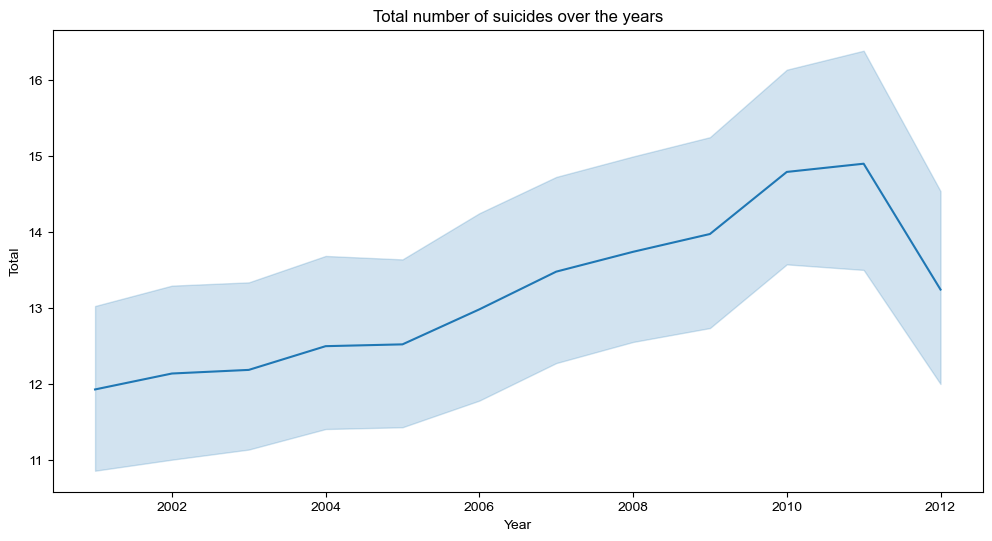

In [13]:
print("Total cases from 2001-12: \n",df_causes.groupby("Year")["Total"].sum())
tot_suicide = df_causes.groupby("Year")["Total"]
plt.figure(figsize=(12,6))
plt.title("Total number of suicides over the years")
sns.lineplot(x='Year',y='Total',data=df_causes)
sns.set(style='dark')
plt.show()

## Suicides across States:

In [16]:
state=df_causes.groupby('State')['Total'].sum().to_frame()
state

Total
State                    
A & N Islands        1623
Andhra Pradesh     162820
Arunachal Pradesh    1328
Assam               34469
Bihar                9245
Chandigarh           1034
Chhattisgarh        60495
D & N Haveli          686
Daman & Diu           279
Delhi (Ut)          16857
Goa                  3475
Gujarat             66177
Haryana             29437
Himachal Pradesh     5319
Jammu & Kashmir      2968
Jharkhand            9950
Karnataka          146965
Kerala             107936
Lakshadweep            10
Madhya Pradesh      90307
Maharashtra        180389
Manipur               421
Meghalaya            1086
Mizoram               834
Nagaland              347
Odisha              53448
Puducherry           6429
Punjab               9270
Rajasthan           51027
Sikkim               1924
Tamil Nadu         163813
Tripura              9194
Uttar Pradesh       46680
Uttarakhand          3702
West Bengal        161030

# Inference:

Southern states namely

Tamil Nadu

Andra Pradesh

Telegana

Karnataka

seems to have higher rates of suicide over the year

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8880\1587792173.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filter_state =df.groupby("State")[["State","Total"]].sum().sort_values('Total',ascending=False).head(10)


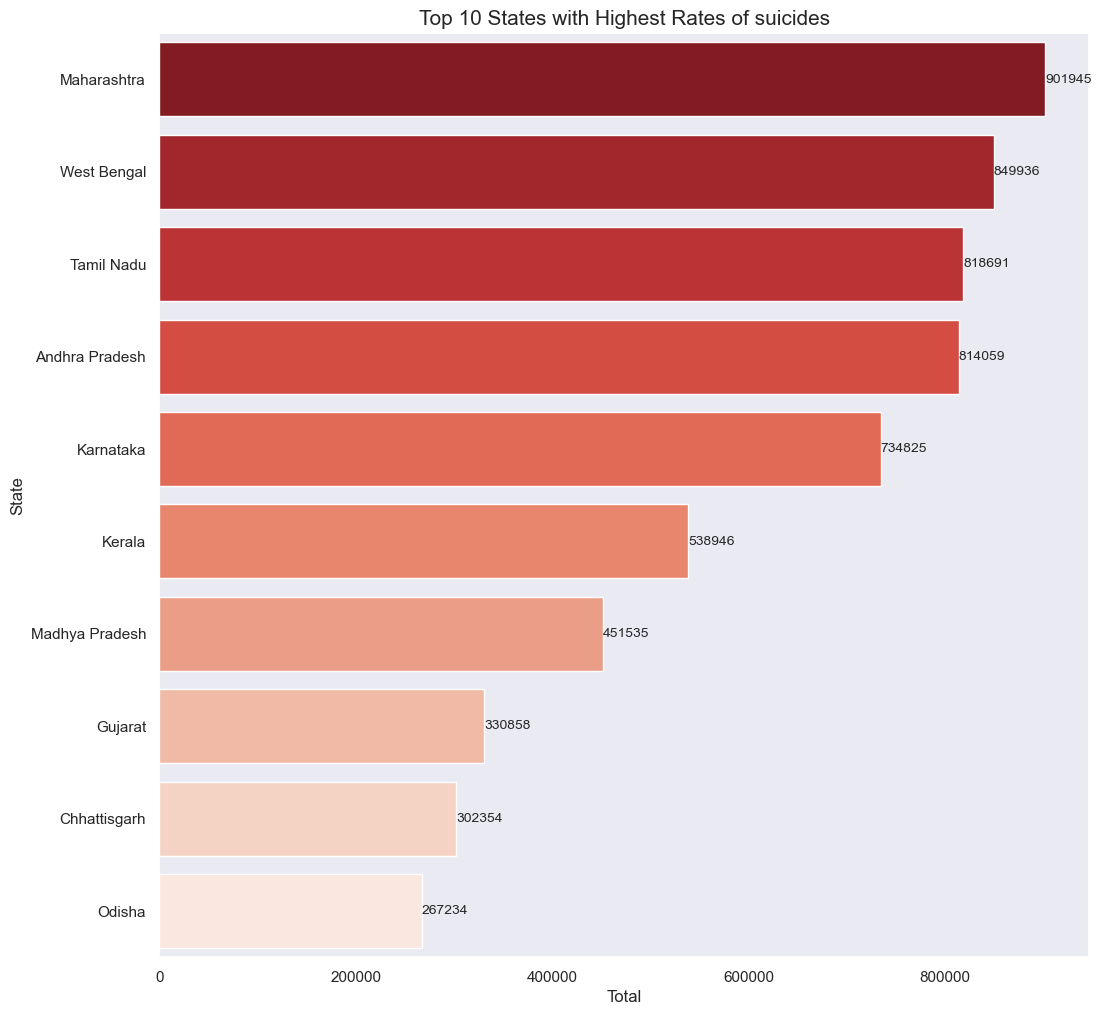

<Figure size 640x480 with 0 Axes>

In [17]:
filter_state =df.groupby("State")[["State","Total"]].sum().sort_values('Total',ascending=False).head(10)
plt.figure(figsize=(12,12))
plt.title("Top 10 States with Highest Rates of suicides",fontsize=15)
c1 = sns.barplot(x="Total",y=filter_state.index,data=filter_state,palette="Reds_r")
c1.bar_label(c1.containers[0],size = 10)
plt.show()
plt.savefig("top10states_highsuicide.png")

# Inference:

Maharastra , West Bengal , Tamil Nadu seems to have highest rates of suicides from 2000-2012

# Gender which tends to commit more Suicides:

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8880\3827136897.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filter_gender = df.groupby("Gender")[["Gender","Total"]].sum().reset_index()


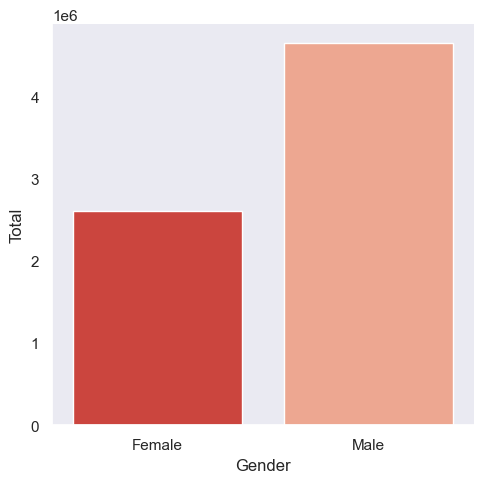

<Figure size 640x480 with 0 Axes>

In [18]:
filter_gender = df.groupby("Gender")[["Gender","Total"]].sum().reset_index()
c1 = sns.catplot(x="Gender", y="Total", kind="bar", data=filter_gender,palette="Reds_r")
plt.show()
plt.savefig("gender_suicide.png")

# Inference:

Males tends to commit more suicides than Females in India.

# Rate of Change of the number of cases over the years:

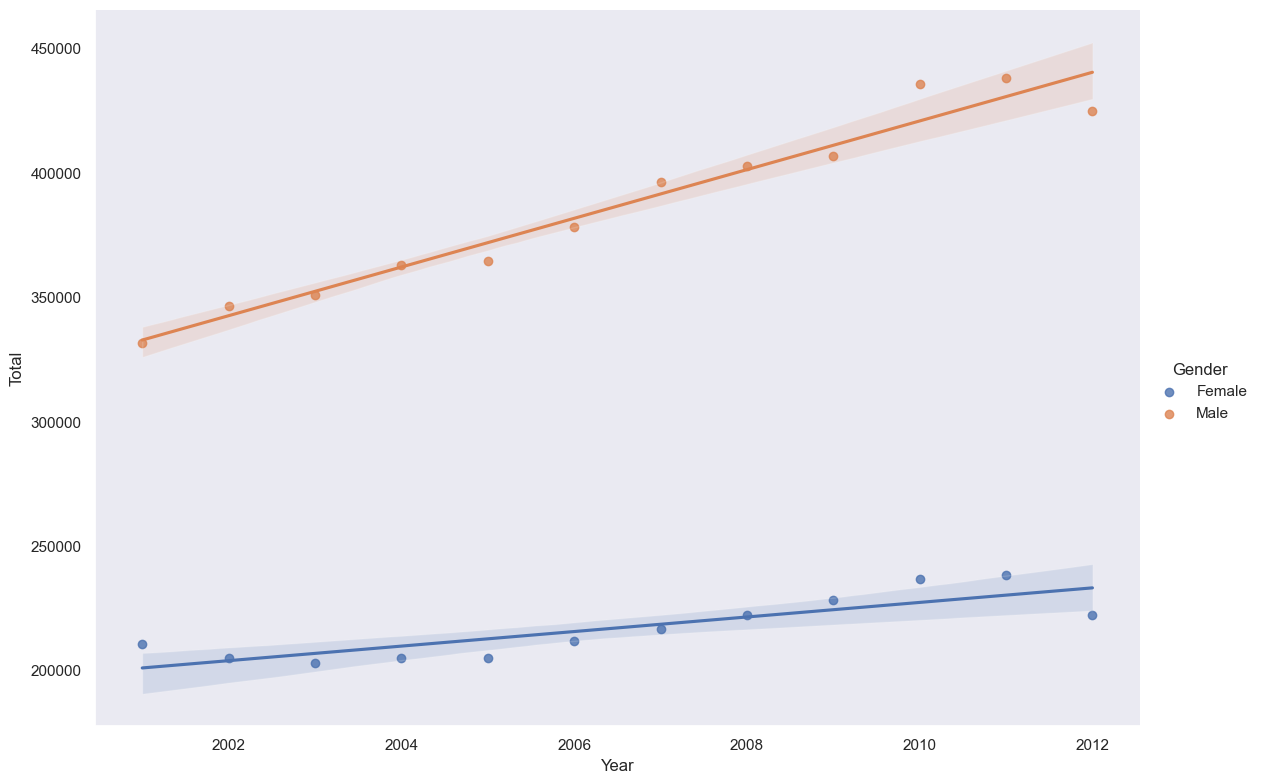

<Figure size 640x480 with 0 Axes>

In [19]:
grp_year = df.groupby(["Year","Gender"])["Total"].sum()
grp_year = pd.DataFrame(grp_year).reset_index()
sns.lmplot(x="Year", y="Total", hue="Gender", data=grp_year,height=8, aspect=11.7/8)
plt.show()
plt.savefig("rt_gender_yrs.png")

# Inference:

There is higher positive slop for Males when compared to females

Indicating that more men would likely resort to suicide in future

# Comparison of the suicide of the Genders over the years

In [20]:
year=df_causes.groupby('Year')['Total'].sum().to_frame()

women=df_causes[df_causes['Gender']=='Female']
women_year=women.groupby('Year')['Total'].sum().to_frame()
women_year.rename(columns={'Total': 'Female'}, inplace=True)

men=df_causes[df_causes['Gender']=='Male']
men_year=men.groupby('Year')['Total'].sum().to_frame()
men_year.rename(columns={'Total': 'Male'}, inplace=True)


In [21]:
gender_year=men_year.join(women_year)
gender_year

Male  Female
Year               
2001  66314   42192
2002  69332   41085
2003  70221   40630
2004  72651   41046
2005  72916   40998
2006  75702   42410
2007  79295   43342
2008  80544   44473
2009  81471   45680
2010  87180   47419
2011  87839   47746
2012  79773   40715

In [22]:
fig = px.bar(gender_year, x=year.index, y=['Female', 'Male'], title='Suicides By Year and Gender', 
             labels={'value':'Number', 'x':'Year', 'variable':'Gender'}, color_discrete_sequence=['red', 'rebeccapurple'])
fig.show()

# Gender-wise suicide in States:

In [23]:
state_gender = (df_causes.groupby(["State","Gender",'Year'])
        .agg(value=pd.NamedAgg(column="Total",aggfunc="sum"))['value']
        .unstack(fill_value=0)
        .rename_axis(None, axis=1)
        .unstack())
state_gender['Total']=state_gender.sum(axis=1, numeric_only=True)
state_gender.style.background_gradient(cmap='Reds')

# Cause of Suicides:

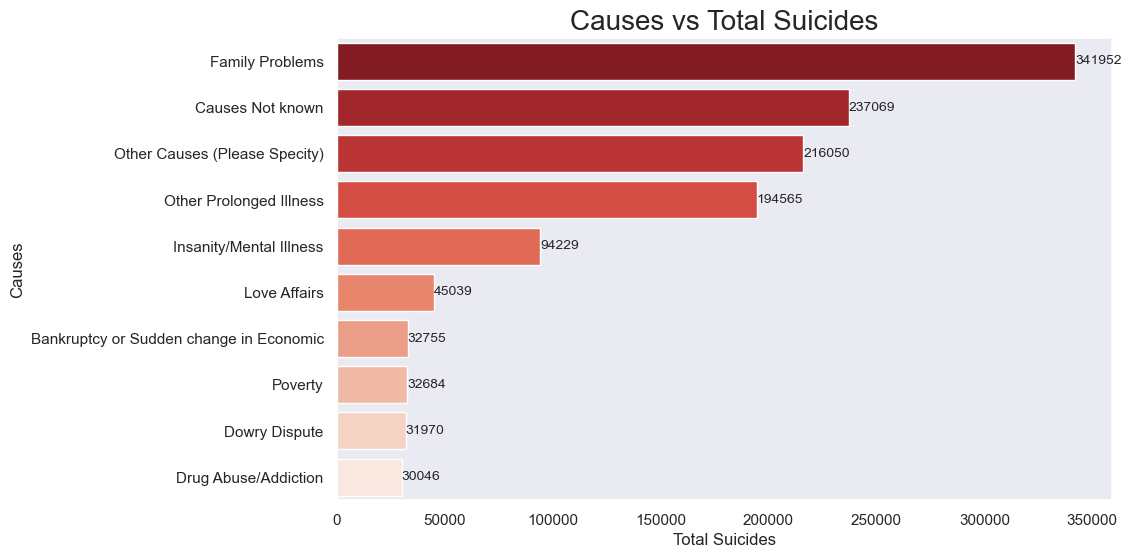

<Figure size 640x480 with 0 Axes>

In [24]:
plt.figure(figsize=(10,6))
temp = df_causes[['Type','Total']].groupby(['Type']).sum().sort_values('Total',ascending=False).head(10)
c1 = sns.barplot(y=temp.index,x=temp.Total,palette="Reds_r")
c1.bar_label(c1.containers[0],size = 10)
plt.title('Causes vs Total Suicides',fontsize=20)
plt.xlabel('Total Suicides')
plt.ylabel('Causes')
plt.show()
plt.savefig("cause_suicide.png")

### Inference:

Family Problems seems to be the leading cause of suicides among people

While Illness also contributed to high rates of suicides , most of the times the very cause of the suicide isnt known.

# Family Problems:

In [25]:
df_causes_fp = df_causes[df_causes.Type=='Family Problems']
df_causes_fp.head()

State  Year Type_code             Type  Gender Age_group  Total
5    A & N Islands  2001    Causes  Family Problems  Female      0-14      0
29   A & N Islands  2001    Causes  Family Problems    Male      0-14      0
69   A & N Islands  2001    Causes  Family Problems  Female     15-29      5
88   A & N Islands  2001    Causes  Family Problems    Male     15-29      3
112  A & N Islands  2001    Causes  Family Problems  Female     30-44      0

# Gender wise Suicide on the basis of Family Problems:

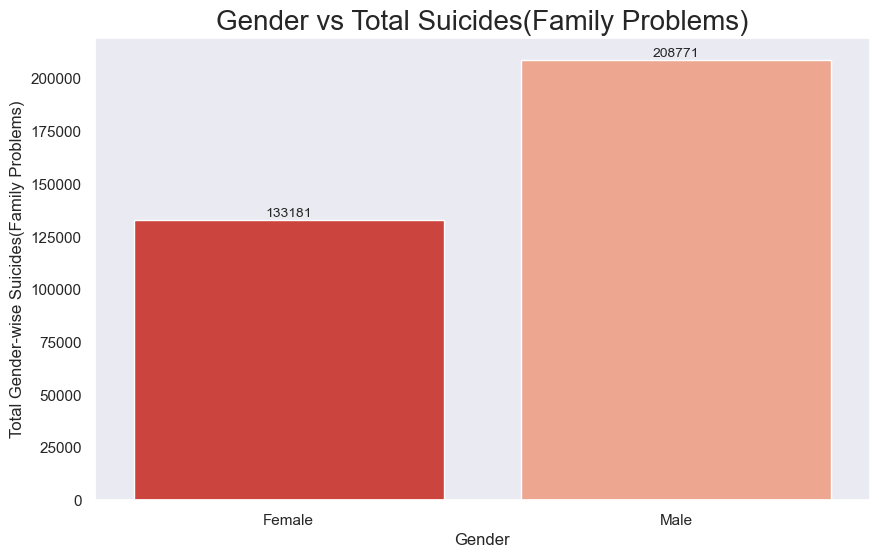

In [26]:
temp = df_causes_fp[['Gender','Total']].groupby(['Gender']).sum()
plt.figure(figsize=(10,6))
plt.title('Gender vs Total Suicides(Family Problems)',fontsize=20)
c1 = sns.barplot(x=temp.index,y=temp.Total,palette="Reds_r")
c1.bar_label(c1.containers[0],size = 10)
plt.xlabel('Gender')
plt.ylabel('Total Gender-wise Suicides(Family Problems)')
plt.show()

### Inference:

Again Males tend to take the decision to suicide more when compared to females.

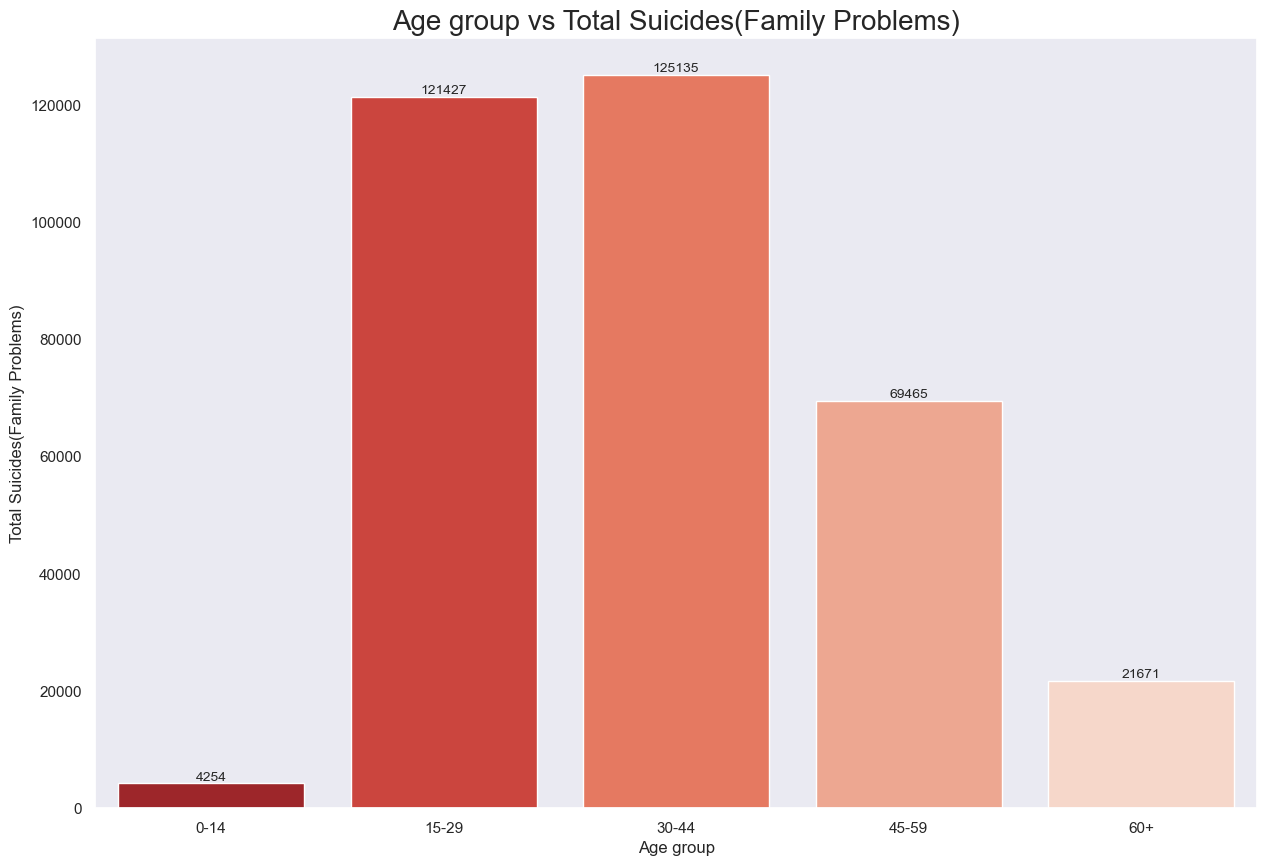

<Figure size 640x480 with 0 Axes>

In [27]:
temp = df_causes_fp[['Age_group','Total']].groupby(['Age_group']).sum()
plt.figure(figsize=(15,10))
c1= sns.barplot(x=temp.index,y=temp.Total,palette="Reds_r")
c1.bar_label(c1.containers[0],size=10)
plt.title('Age group vs Total Suicides(Family Problems)',fontsize=20)
plt.xlabel('Age group')
plt.ylabel('Total Suicides(Family Problems)')
plt.show()
plt.savefig("familyprob_agegrp.png")

### Inference:

People in their mid 30's till mid 40's tend to suicide a lot more closely followed by people in the their youth (15-29)

# State wise Suicide rates on the basis of Family Problems:

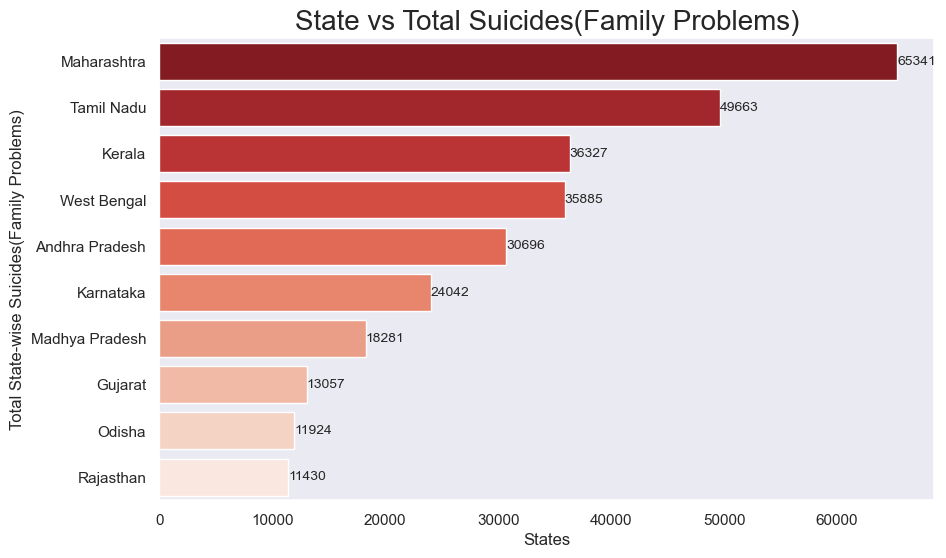

<Figure size 640x480 with 0 Axes>

In [28]:
temp = df_causes_fp[['State','Total']].groupby(['State']).sum().sort_values('Total',ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.title('State vs Total Suicides(Family Problems)',fontsize=20)
c1 = sns.barplot(y=temp.index,x=temp.Total,palette="Reds_r")
c1.bar_label(c1.containers[0],size = 10)
plt.xlabel('States')
plt.ylabel('Total State-wise Suicides(Family Problems)')
plt.show()
plt.savefig("familyprob_state.png")

### Inference:

Maharastra as usual leads the suicide rates for people dealing with family problems

Followed by Tamil Nadu and Kerala.

# Insanity/Mental Illness:

In [29]:
df_causes_mi = df_causes[df_causes.Type=='Insanity/Mental Illness']
df_causes_mi.head()

State  Year Type_code                     Type  Gender Age_group  \
12   A & N Islands  2001    Causes  Insanity/Mental Illness  Female      0-14   
49   A & N Islands  2001    Causes  Insanity/Mental Illness    Male      0-14   
77   A & N Islands  2001    Causes  Insanity/Mental Illness  Female     15-29   
90   A & N Islands  2001    Causes  Insanity/Mental Illness    Male     15-29   
127  A & N Islands  2001    Causes  Insanity/Mental Illness  Female     30-44   

     Total  
12       0  
49       0  
77       2  
90       2  
127      2

# Gender wise Suicide on the basis of Mental Illness :

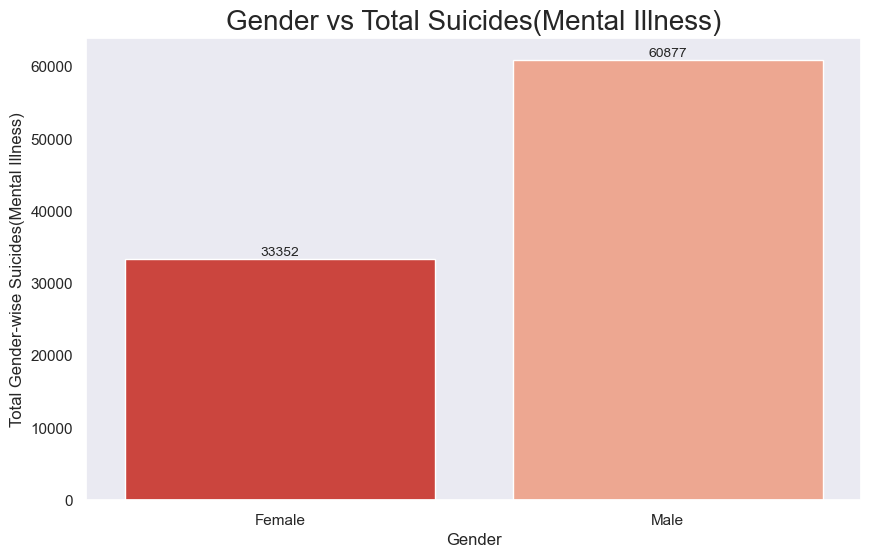

<Figure size 640x480 with 0 Axes>

In [30]:
temp = df_causes_mi[['Gender','Total']].groupby(['Gender']).sum()
plt.figure(figsize=(10,6))
plt.title('Gender vs Total Suicides(Mental Illness)',fontsize=20)
c1 = sns.barplot(x=temp.index,y=temp.Total,palette="Reds_r")
c1.bar_label(c1.containers[0],size = 10)
plt.xlabel('Gender')
plt.ylabel('Total Gender-wise Suicides(Mental Illness)')
plt.show()
plt.savefig("mentalillness_gender.png")

# Age-group wise Suicide rates on the basis of Mental Illness

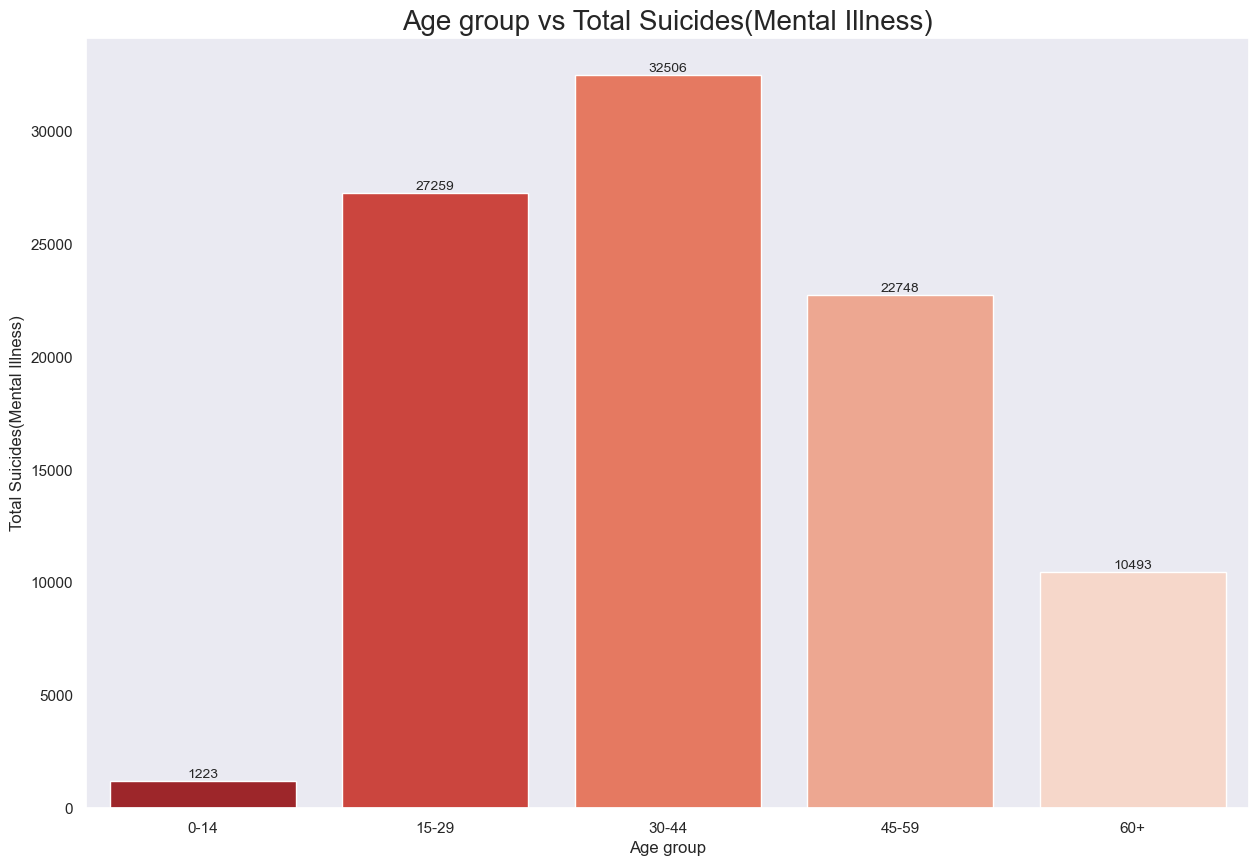

In [31]:
temp = df_causes_mi[['Age_group','Total']].groupby(['Age_group']).sum()
plt.figure(figsize=(15,10))
c1= sns.barplot(x=temp.index,y=temp.Total,palette="Reds_r")
c1.bar_label(c1.containers[0],size=10)
plt.title('Age group vs Total Suicides(Mental Illness)',fontsize=20)
plt.xlabel('Age group')
plt.ylabel('Total Suicides(Mental Illness)')
plt.show()

# state wise Suicide rates on the basis of Mental Illness:

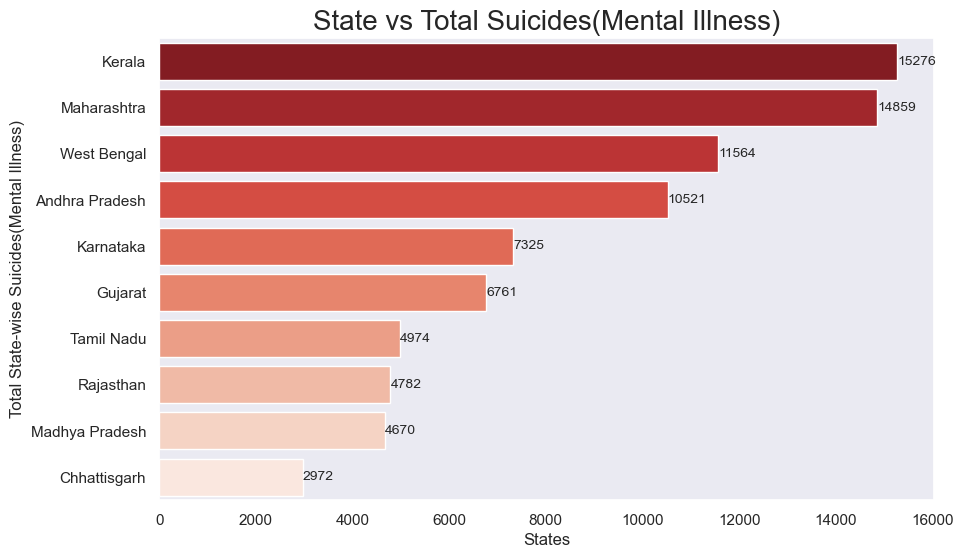

<Figure size 640x480 with 0 Axes>

In [32]:
temp = df_causes_mi[['State','Total']].groupby(['State']).sum().sort_values('Total',ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.title('State vs Total Suicides(Mental Illness)',fontsize=20)
c1 = sns.barplot(y=temp.index,x=temp.Total,palette="Reds_r")
c1.bar_label(c1.containers[0],size = 10)
plt.xlabel('States')
plt.ylabel('Total State-wise Suicides(Mental Illness)')
plt.show()
plt.savefig("mentalillness_state.png")

Kerala is closely closely followed by Maharastra where many people get to suicide due to mental illness.

West Bengal also has high rates of suicide due to mental illness.

# Love Affairs:

In [33]:
df_causes_la = df_causes[df_causes.Type=='Love Affairs']
df_causes_la.head()

State  Year Type_code          Type  Gender Age_group  Total
13   A & N Islands  2001    Causes  Love Affairs  Female      0-14      1
42   A & N Islands  2001    Causes  Love Affairs    Male      0-14      0
65   A & N Islands  2001    Causes  Love Affairs  Female     15-29      0
89   A & N Islands  2001    Causes  Love Affairs    Male     15-29      3
128  A & N Islands  2001    Causes  Love Affairs  Female     30-44      0

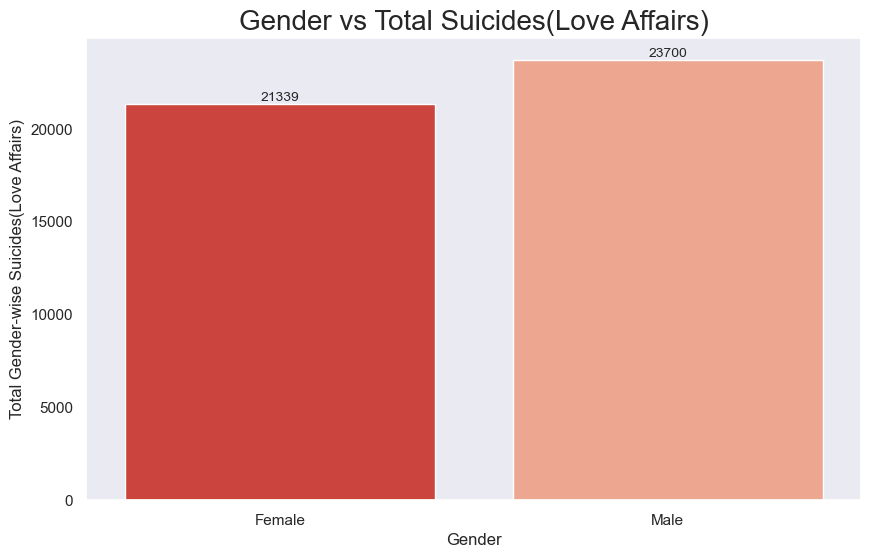

<Figure size 640x480 with 0 Axes>

In [34]:
temp = df_causes_la[['Gender','Total']].groupby(['Gender']).sum()
plt.figure(figsize=(10,6))
plt.title('Gender vs Total Suicides(Love Affairs)',fontsize=20)
c1 = sns.barplot(x=temp.index,y=temp.Total,palette="Reds_r")
c1.bar_label(c1.containers[0],size = 10)
plt.xlabel('Gender')
plt.ylabel('Total Gender-wise Suicides(Love Affairs)')
plt.show()
plt.savefig("loveaffairs_gender.png")

# Inference:

Males tend to suicide more when compared to females due to love affair

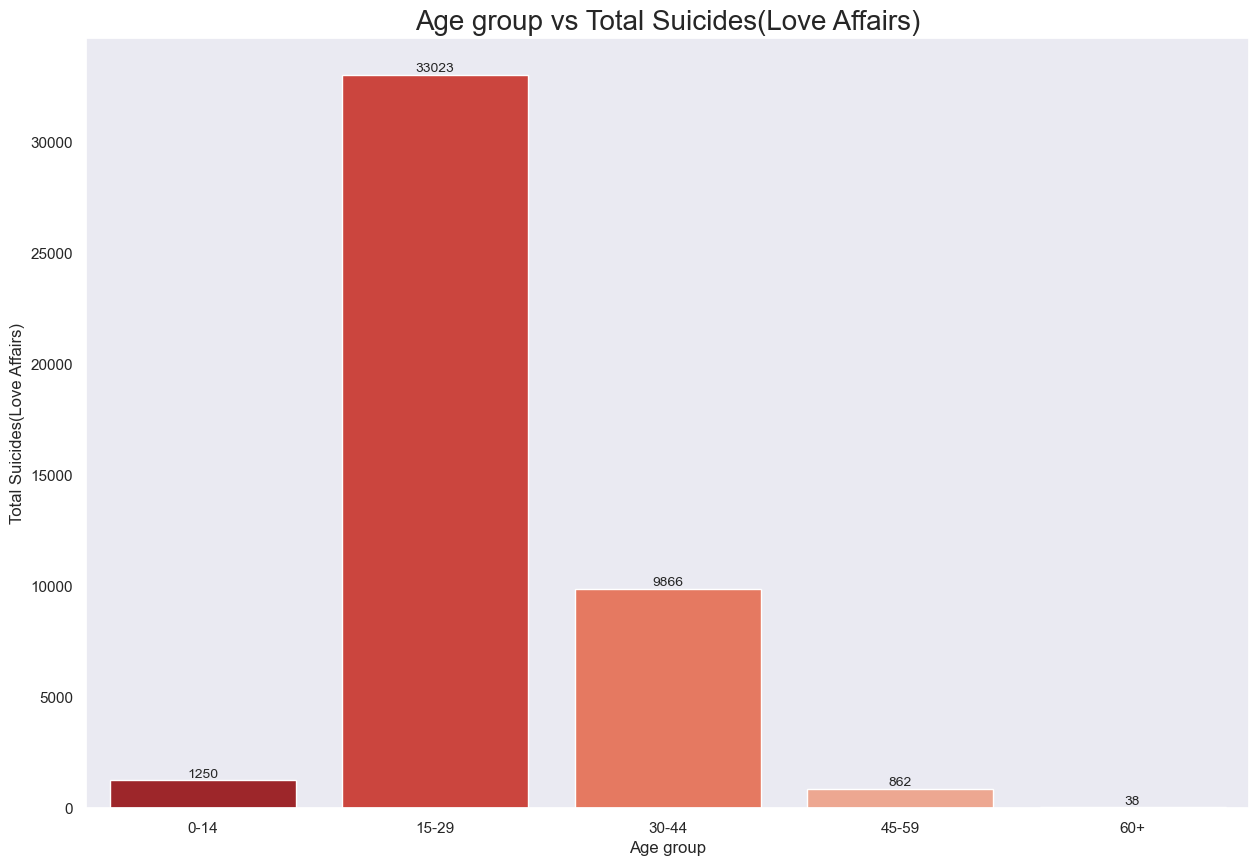

<Figure size 640x480 with 0 Axes>

In [35]:
temp = df_causes_la[['Age_group','Total']].groupby(['Age_group']).sum()
plt.figure(figsize=(15,10))
c1= sns.barplot(x=temp.index,y=temp.Total,palette="Reds_r")
c1.bar_label(c1.containers[0],size=10)
plt.title('Age group vs Total Suicides(Love Affairs)',fontsize=20)
plt.xlabel('Age group')
plt.ylabel('Total Suicides(Love Affairs)')
plt.show()
plt.savefig("loveaffairs_agegrp.png")

# Inference:

People in the age group of 15-29 tend to take rash decision of suiciding way more than the people beloning to other age groups

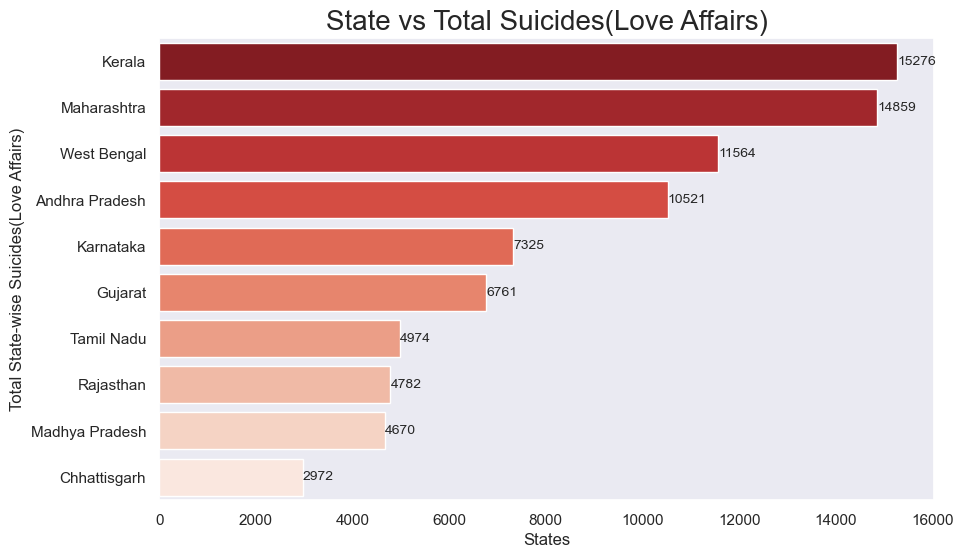

In [36]:
temp = df_causes_mi[['State','Total']].groupby(['State']).sum().sort_values('Total',ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.title('State vs Total Suicides(Love Affairs)',fontsize=20)
c1 = sns.barplot(y=temp.index,x=temp.Total,palette="Reds_r")
c1.bar_label(c1.containers[0],size = 10)
plt.xlabel('States')
plt.ylabel('Total State-wise Suicides(Love Affairs)')
plt.show()

# Bankruptcy`

In [37]:
df_causes_bank = df_causes[df_causes.Type=='Bankruptcy or Sudden change in Economic']
df_causes_bank.head()

State  Year Type_code                                     Type  \
1    A & N Islands  2001    Causes  Bankruptcy or Sudden change in Economic   
48   A & N Islands  2001    Causes  Bankruptcy or Sudden change in Economic   
56   A & N Islands  2001    Causes  Bankruptcy or Sudden change in Economic   
84   A & N Islands  2001    Causes  Bankruptcy or Sudden change in Economic   
118  A & N Islands  2001    Causes  Bankruptcy or Sudden change in Economic   

     Gender Age_group  Total  
1    Female      0-14      0  
48     Male      0-14      0  
56   Female     15-29      0  
84     Male     15-29      0  
118  Female     30-44      0

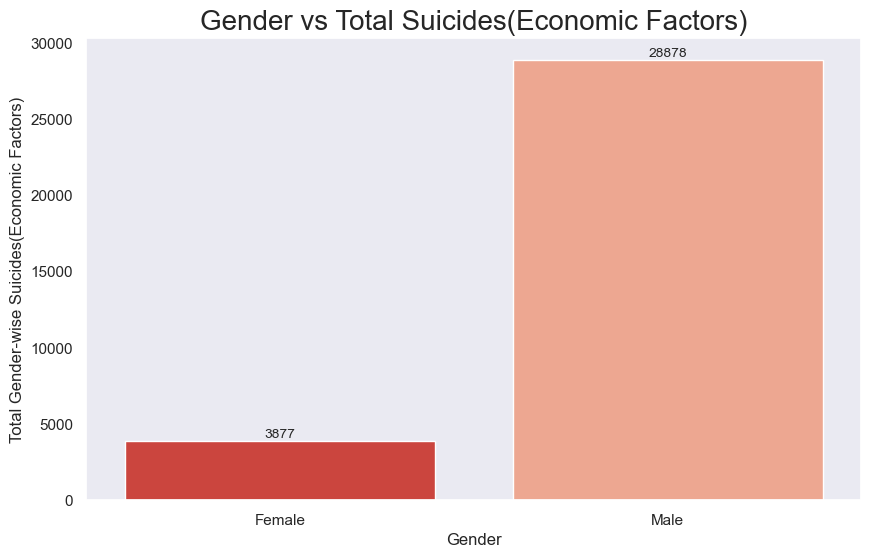

In [38]:
temp = df_causes_bank[['Gender','Total']].groupby(['Gender']).sum()
plt.figure(figsize=(10,6))
plt.title('Gender vs Total Suicides(Economic Factors)',fontsize=20)
c1 = sns.barplot(x=temp.index,y=temp.Total,palette="Reds_r")
c1.bar_label(c1.containers[0],size = 10)
plt.xlabel('Gender')
plt.ylabel('Total Gender-wise Suicides(Economic Factors)')
plt.show()


# Inference:

Males tend to suicide lot more when compared to Females due to economic factors

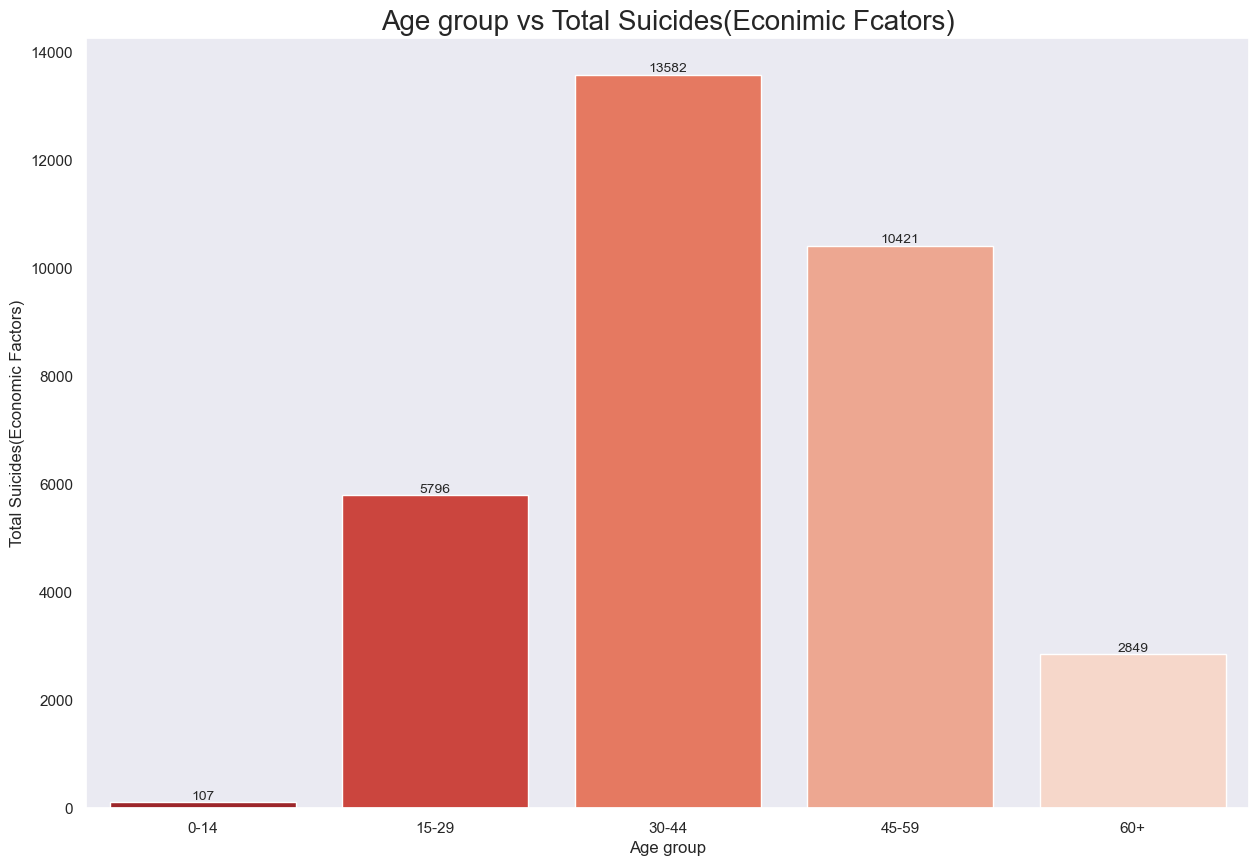

In [39]:
temp = df_causes_bank[['Age_group','Total']].groupby(['Age_group']).sum()
plt.figure(figsize=(15,10))
c1= sns.barplot(x=temp.index,y=temp.Total,palette="Reds_r")
c1.bar_label(c1.containers[0],size=10)
plt.title('Age group vs Total Suicides(Econimic Fcators)',fontsize=20)
plt.xlabel('Age group')
plt.ylabel('Total Suicides(Economic Factors)')
plt.show()

# Inference:

People in the age group of 30-44 tend to suicide more only followed by people belonging to age group 45-59

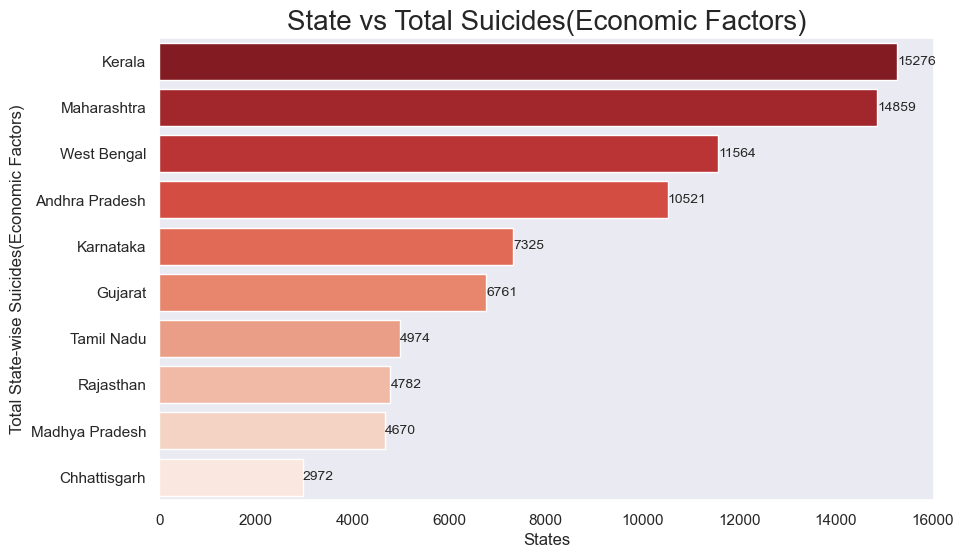

<Figure size 640x480 with 0 Axes>

In [40]:
temp = df_causes_mi[['State','Total']].groupby(['State']).sum().sort_values('Total',ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.title('State vs Total Suicides(Economic Factors)',fontsize=20)
c1 = sns.barplot(y=temp.index,x=temp.Total,palette="Reds_r")
c1.bar_label(c1.containers[0],size = 10)
plt.xlabel('States')
plt.ylabel('Total State-wise Suicides(Economic Factors)')
plt.show()
plt.savefig("ecofact_state.png")


# Inference:

Suicides due to economic factors are high in Kerala followed by Maharastra and West Bengal

# Suicides on the basis of genders by State,Year and Cause:

In [41]:
st_yr_cause_df = (df_causes.groupby(["State","Gender",'Year',"Type"])
        .agg(value=pd.NamedAgg(column="Total",aggfunc="sum"))['value']
        .unstack(fill_value=0)
        .rename_axis(None, axis=1)
        .unstack())
st_yr_cause_df['Total']=st_yr_cause_df.sum(axis=1, numeric_only=True)
st_yr_cause_df.style.background_gradient(cmap='Reds')

# Education Status of People who have committed suicide:

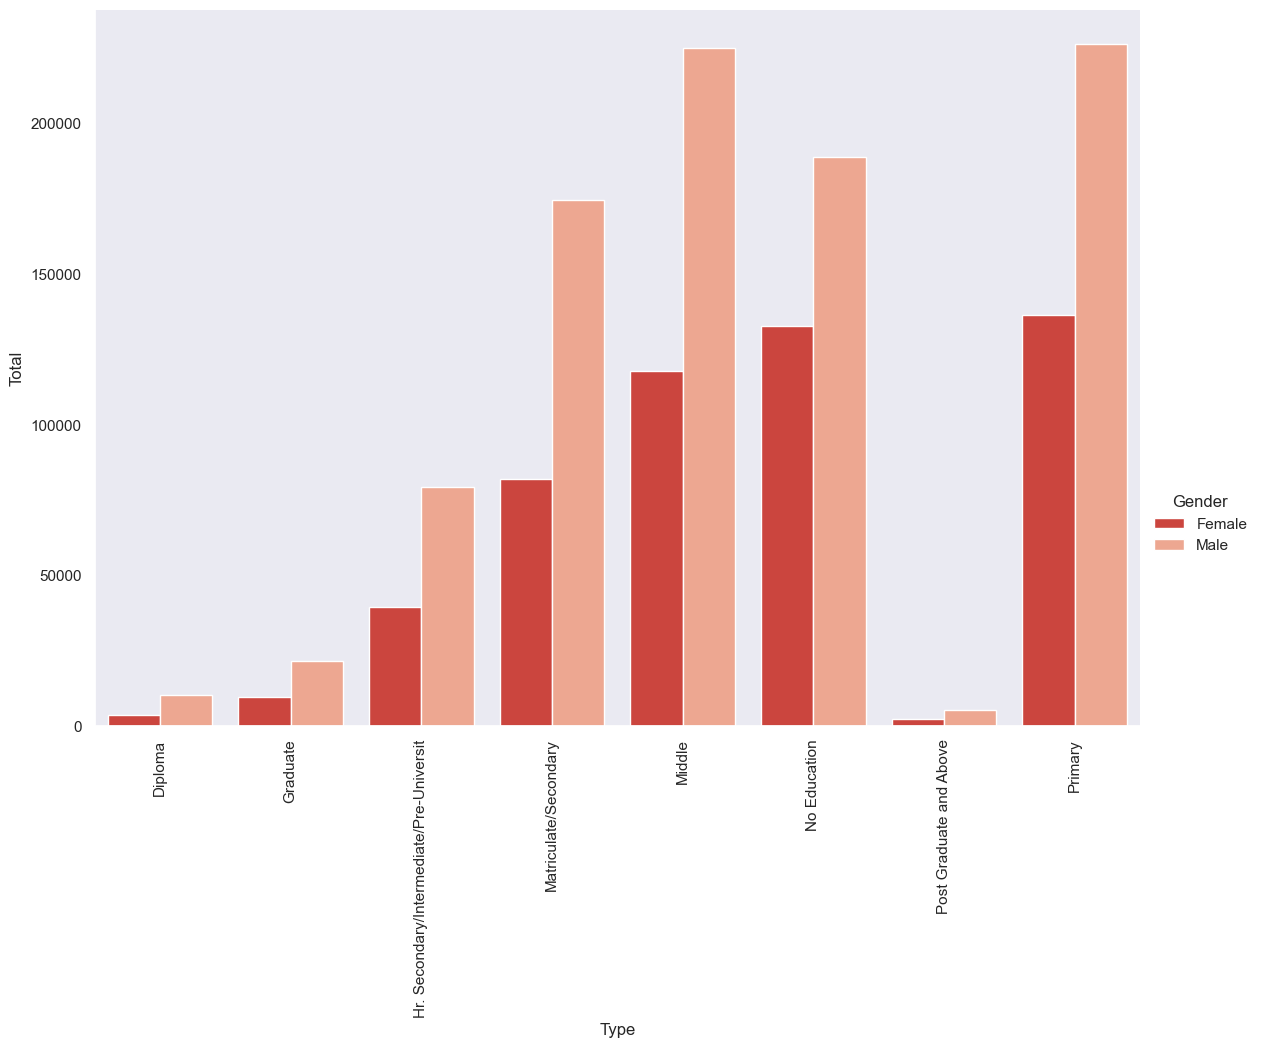

<Figure size 640x480 with 0 Axes>

In [42]:
filter_social_status = pd.DataFrame(df[df["Type_code"]=="Education_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
g = sns.catplot(x="Type", y="Total",hue="Gender", kind="bar",palette="Reds_r",data=filter_social_status,height=8, aspect=11.7/8)
g.set_xticklabels(rotation=90)
plt.show()
plt.savefig("educationstatus.png")

# Inference:

People with Low or No education tend to commit more suicide.

People with Graduate and Diploma degrees

In [43]:
 df_edu = df[df.Type_code=='Education_Status']
df_edu

State  Year         Type_code                     Type  \
260     A & N Islands  2001  Education_Status                  Diploma   
261     A & N Islands  2001  Education_Status             No Education   
262     A & N Islands  2001  Education_Status  Post Graduate and Above   
263     A & N Islands  2001  Education_Status                   Middle   
264     A & N Islands  2001  Education_Status                 Graduate   
...               ...   ...               ...                      ...   
237234    West Bengal  2012  Education_Status                  Primary   
237235    West Bengal  2012  Education_Status             No Education   
237236    West Bengal  2012  Education_Status                   Middle   
237237    West Bengal  2012  Education_Status                 Graduate   
237238    West Bengal  2012  Education_Status    Matriculate/Secondary   

        Gender Age_group  Total  
260     Female    0-100+      0  
261     Female    0-100+      4  
262     Female    0-100+      0  
263     Female    0-100+     33  
264     Female    0-100+      0  
...        ...       ...    ...  
237234    Male    0-100+   2983  
237235    Male    0-100+   1096  
237236    Male    0-100+   2467  
237237    Male    0-100+    242  
237238    Male    0-100+   1260  

[6720 rows x 7 columns]

# Suicides of People with No Education

In [44]:
df_noedu = df_edu[df_edu.Type=='No Education']
df_noedu.head()

State  Year         Type_code          Type  Gender Age_group  \
261   A & N Islands  2001  Education_Status  No Education  Female    0-100+   
272   A & N Islands  2001  Education_Status  No Education    Male    0-100+   
824   A & N Islands  2002  Education_Status  No Education  Female    0-100+   
834   A & N Islands  2002  Education_Status  No Education    Male    0-100+   
1380  A & N Islands  2003  Education_Status  No Education  Female    0-100+   

      Total  
261       4  
272       7  
824       0  
834       0  
1380      1

# Year wise suicide rates of people with No education:`

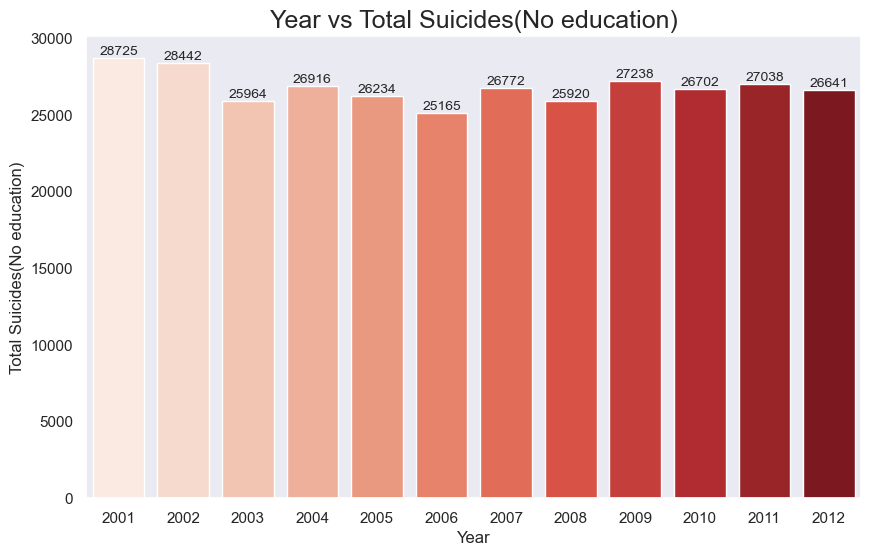

<Figure size 640x480 with 0 Axes>

In [45]:
temp = df_noedu[['Year','Total']].groupby(['Year']).sum()
plt.figure(figsize=(10,6))
c1 = sns.barplot(x=temp.index,y=temp.Total,palette="Reds")
c1.bar_label(c1.containers[0],size=10)
plt.title('Year vs Total Suicides(No education)',fontsize=18)
plt.xlabel('Year')
plt.ylabel('Total Suicides(No education)')
plt.show()
plt.savefig("educationwise_noedu_yr.png")

# Top 10 States with suicide rates where people arent educated

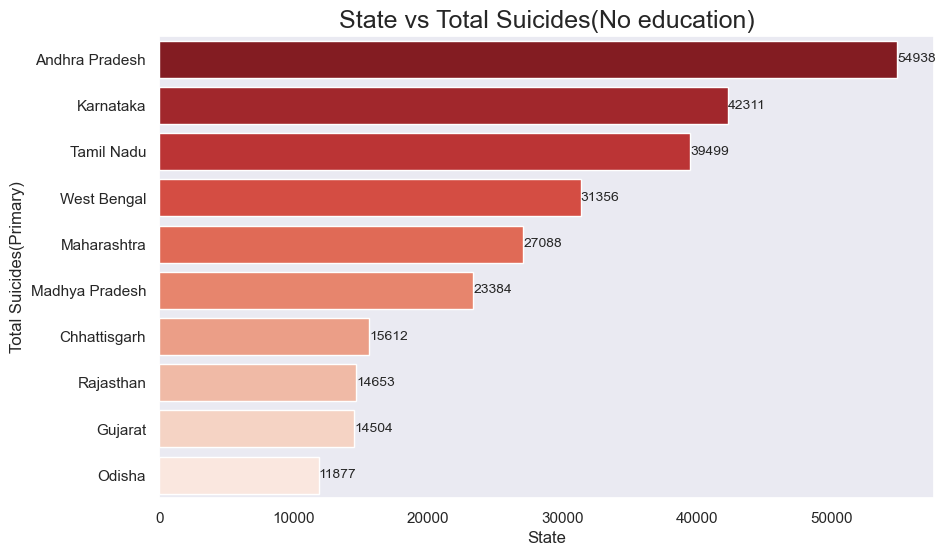

<Figure size 640x480 with 0 Axes>

In [46]:
plt.figure(figsize=(10,6))
temp = df_noedu[['State','Total']].groupby(['State']).sum().sort_values('Total',ascending=False).head(10)
c1 = sns.barplot(y=temp.index,x=temp.Total,palette="Reds_r")
c1.bar_label(c1.containers[0],size=10)
plt.title('State vs Total Suicides(No education)',fontsize=18)
plt.xlabel('State')
plt.ylabel('Total Suicides(Primary)')
plt.show()
plt.savefig("noeducation_state.png")

Andra Pradesh,Karnataka and Tamil Nadu are the top 3 states with people having no education have high rates of suicides.

# Suicides of People with Primary Education:

In [47]:
df_primary = df_edu[df_edu.Type=='Primary']
df_primary.head()

State  Year         Type_code     Type  Gender Age_group  Total
266   A & N Islands  2001  Education_Status  Primary  Female    0-100+      7
275   A & N Islands  2001  Education_Status  Primary    Male    0-100+     20
826   A & N Islands  2002  Education_Status  Primary  Female    0-100+      0
830   A & N Islands  2002  Education_Status  Primary    Male    0-100+     15
1385  A & N Islands  2003  Education_Status  Primary  Female    0-100+      1

# Year wise suicide rates of people with primary education:

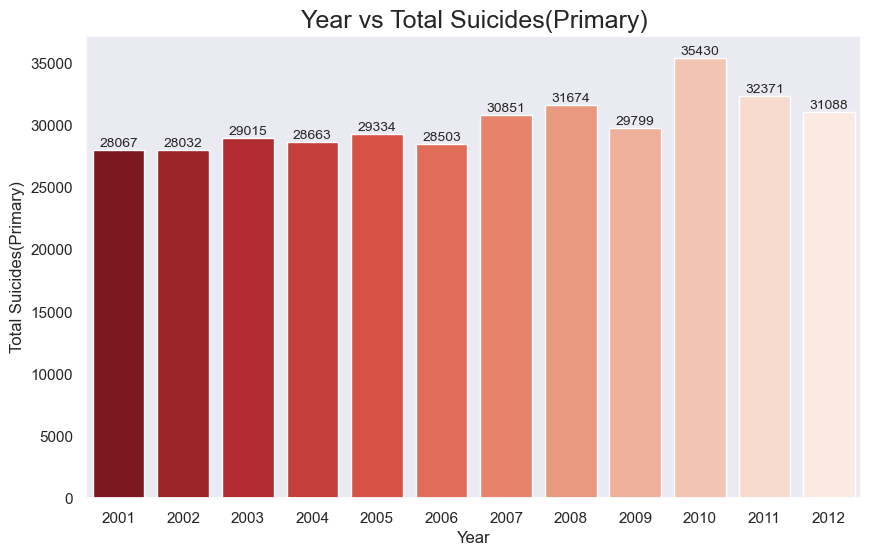

In [48]:
temp = df_primary[['Year','Total']].groupby(['Year']).sum()
plt.figure(figsize=(10,6))
c1=sns.barplot(x=temp.index,y=temp.Total,palette="Reds_r")
c1.bar_label(c1.containers[0],size=10)
plt.title('Year vs Total Suicides(Primary)',fontsize=18)
plt.xlabel('Year')
plt.ylabel('Total Suicides(Primary)')
plt.show()

# Top 10 States with High Suicide rates among the primarily educated

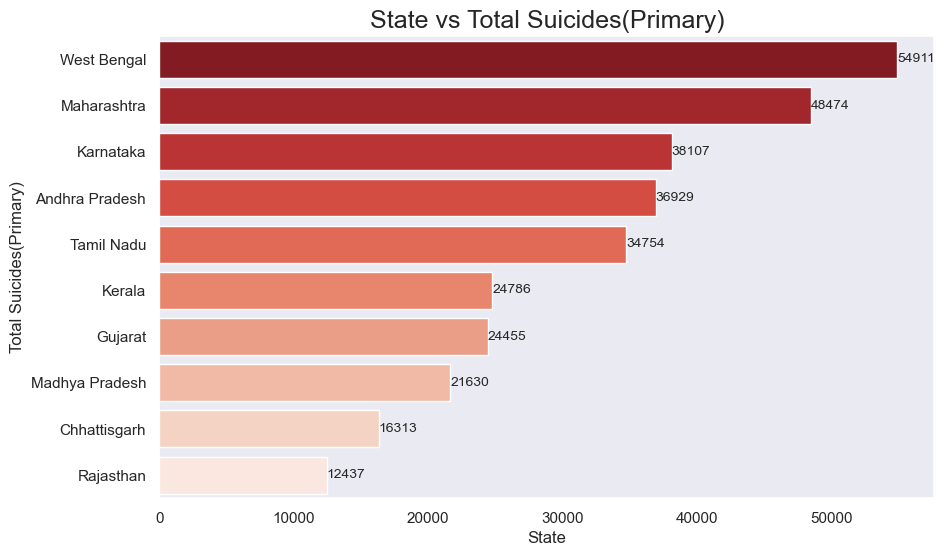

<Figure size 640x480 with 0 Axes>

In [49]:
plt.figure(figsize=(10,6))
temp = df_primary[['State','Total']].groupby(['State']).sum().sort_values('Total',ascending=False).head(10)
c1 = sns.barplot(y=temp.index,x=temp.Total,palette="Reds_r")
c1.bar_label(c1.containers[0],size=10)
plt.title('State vs Total Suicides(Primary)',fontsize=18)
plt.xlabel('State')
plt.ylabel('Total Suicides(Primary)')
plt.show()
plt.savefig("primaryedu_state.png")

In [50]:
#West Bengal,Maharastra,Karnataka are the top 3 states with people having primary education have high rates of suicides.

# Suicides on the basis of genders by State,Gender and Age-Group:

In [51]:
st_yr_age= (df_causes.groupby(["State","Gender", 'Age_group'])
        .agg(value=pd.NamedAgg(column="Total",aggfunc="sum"))['value']
        .unstack( fill_value=0)
        .rename_axis(None, axis=1)
        .unstack(level=1).unstack().unstack())
st_yr_age.style.background_gradient(cmap='Reds', axis=1)

# Profession of the People who committed suicide

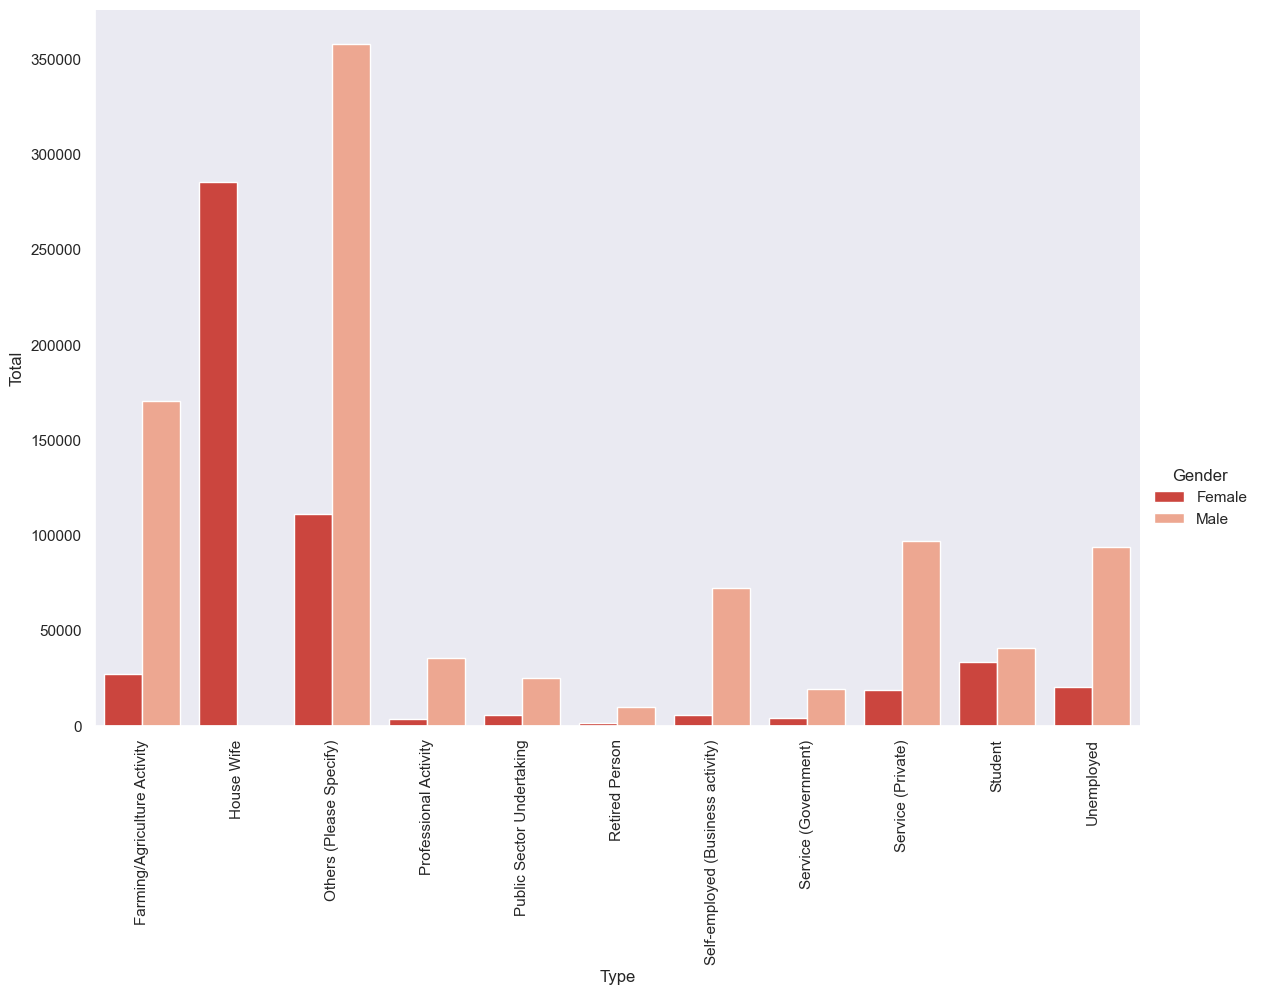

<Figure size 640x480 with 0 Axes>

In [52]:
filter_social_status = pd.DataFrame(df[df["Type_code"]=="Professional_Profile"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
g = sns.catplot(x="Type", y="Total",hue="Gender", kind="bar",palette="Reds_r",data=filter_social_status,height=8, aspect=11.7/8)
g.set_xticklabels(rotation=90)
plt.show()
plt.savefig("profession_gender.png")

### Inference:

Farmers and Housewives tend to commit more suicide.

# Suicides of Housewives

In [54]:
df_social = df[df.Type_code=='Professional_Profile']

In [55]:
df_housewives = df_social[df_social.Type=='House Wife']
df_housewives.head()

State  Year             Type_code        Type  Gender Age_group  \
440  A & N Islands  2001  Professional_Profile  House Wife  Female      0-14   
457  A & N Islands  2001  Professional_Profile  House Wife    Male      0-14   
461  A & N Islands  2001  Professional_Profile  House Wife  Female     15-29   
481  A & N Islands  2001  Professional_Profile  House Wife    Male     15-29   
484  A & N Islands  2001  Professional_Profile  House Wife  Female     30-44   

     Total  
440      0  
457      0  
461     21  
481      0  
484      9

# Age-group wise suicide rates of Housewives

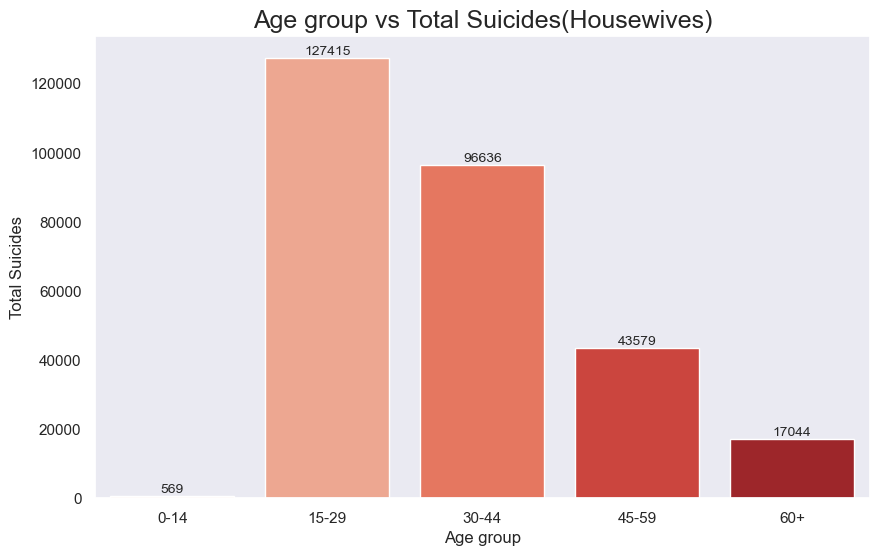

In [56]:
temp = df_housewives[['Age_group','Total']].groupby(['Age_group']).sum()
plt.figure(figsize=(10,6))
c1= sns.barplot(x=temp.index,y=temp.Total,palette='Reds')
c1.bar_label(c1.containers[0],fontsize=10)
plt.title('Age group vs Total Suicides(Housewives)',fontsize=18)
plt.xlabel('Age group')
plt.ylabel('Total Suicides')
plt.show()

# State wise suicide rates of Housewives:

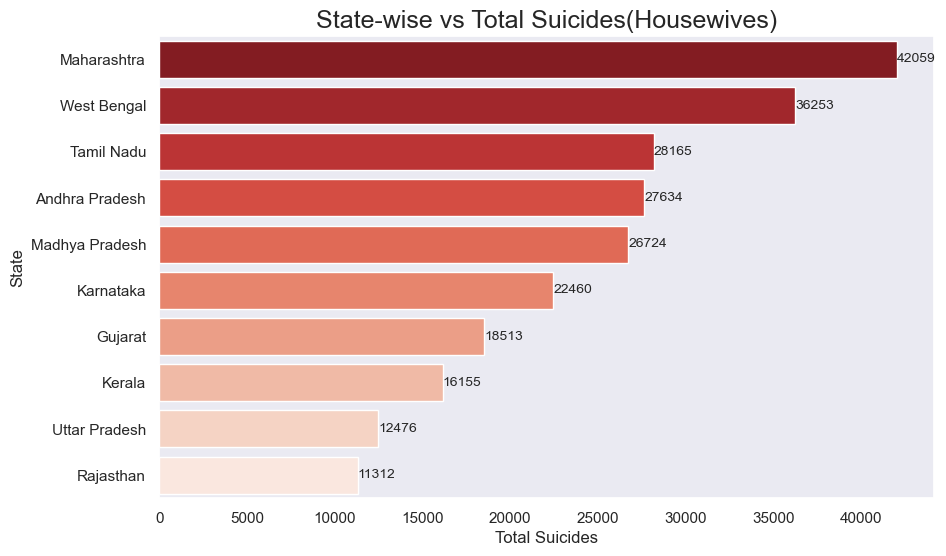

<Figure size 640x480 with 0 Axes>

In [57]:
temp = df_housewives[['State','Total']].groupby(['State']).sum().sort_values('Total',ascending=False).head(10)
plt.figure(figsize=(10,6))
c1= sns.barplot(y=temp.index,x=temp.Total,palette='Reds_r')
c1.bar_label(c1.containers[0],fontsize=10)
plt.title('State-wise vs Total Suicides(Housewives)',fontsize=18)
plt.xlabel('Total Suicides')
plt.ylabel('State')
plt.show()
plt.savefig("housewives.png")

# Suicides rates of people associated with farming:1

In [58]:
df_farmers = df_social[df_social.Type=='Farming/Agriculture Activity']
df_farmers.head()

State  Year             Type_code                          Type  \
445  A & N Islands  2001  Professional_Profile  Farming/Agriculture Activity   
449  A & N Islands  2001  Professional_Profile  Farming/Agriculture Activity   
470  A & N Islands  2001  Professional_Profile  Farming/Agriculture Activity   
471  A & N Islands  2001  Professional_Profile  Farming/Agriculture Activity   
490  A & N Islands  2001  Professional_Profile  Farming/Agriculture Activity   

     Gender Age_group  Total  
445  Female      0-14      0  
449    Male      0-14      0  
470  Female     15-29      0  
471    Male     15-29      0  
490  Female     30-44      0

# Age-group wise suicide rates of people associated with Farming

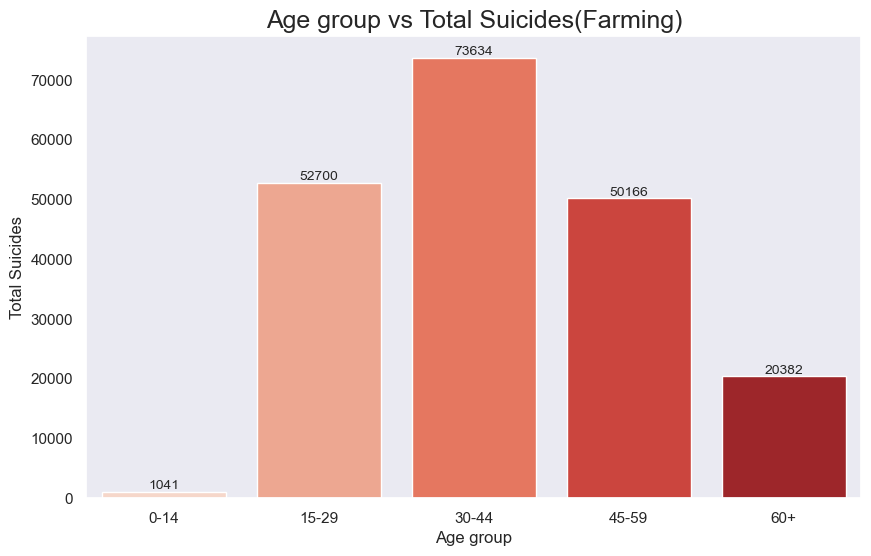

<Figure size 640x480 with 0 Axes>

In [59]:
temp = df_farmers[['Age_group','Total']].groupby(['Age_group']).sum()
plt.figure(figsize=(10,6))
c1= sns.barplot(x=temp.index,y=temp.Total,palette='Reds')
c1.bar_label(c1.containers[0],fontsize=10)
plt.title('Age group vs Total Suicides(Farming)',fontsize=18)
plt.xlabel('Age group')
plt.ylabel('Total Suicides')
plt.show()
plt.savefig("agegrp_farming.png")


# Inference:

People in the age group of 30-44 commit more suicide when compared to people associated with farming in the range 15-29 or 45-59 

### State wise suicide rates of people Associated with Farming:

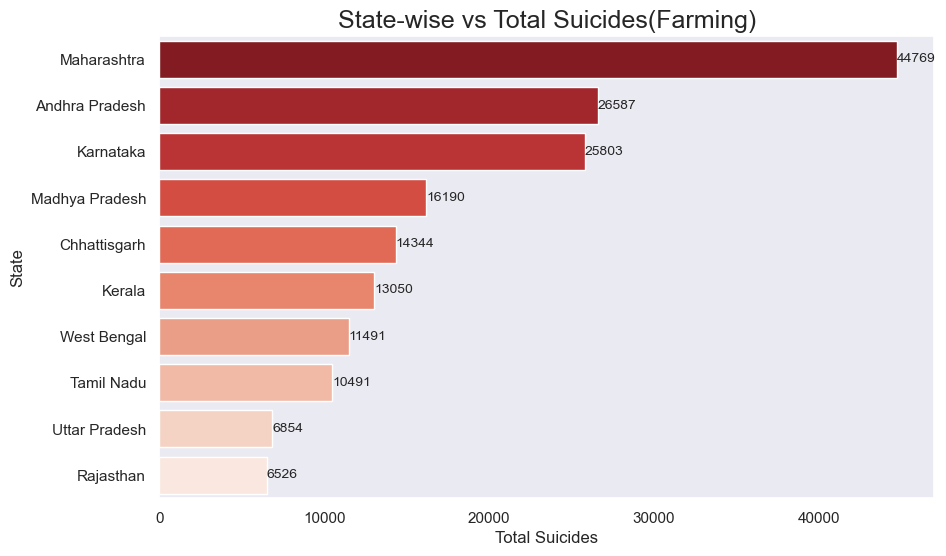

<Figure size 640x480 with 0 Axes>

In [60]:
temp = df_farmers[['State','Total']].groupby(['State']).sum().sort_values('Total',ascending=False).head(10)
plt.figure(figsize=(10,6))
c1= sns.barplot(y=temp.index,x=temp.Total,palette='Reds_r')
c1.bar_label(c1.containers[0],fontsize=10)
plt.title('State-wise vs Total Suicides(Farming)',fontsize=18)
plt.xlabel('Total Suicides')
plt.ylabel('State')
plt.show()
plt.savefig("state_farming.png")

# Inference:

People from the states Maharastra ,AndraPradesh ,Karnataka related with farming and related activites commit more suicide.

# Means adopted to suicide

In [61]:
df_means = df[df.Type_code=='Means_adopted']
df_means.head()

State  Year      Type_code                           Type  \
276  A & N Islands  2001  Means_adopted      By Consuming Insecticides   
277  A & N Islands  2001  Means_adopted                     By Hanging   
278  A & N Islands  2001  Means_adopted  By Jumping from (Other sites)   
279  A & N Islands  2001  Means_adopted     By touching electric wires   
280  A & N Islands  2001  Means_adopted                     By Machine   

     Gender Age_group  Total  
276  Female      0-14      0  
277  Female      0-14      2  
278  Female      0-14      0  
279  Female      0-14      0  
280  Female      0-14      0

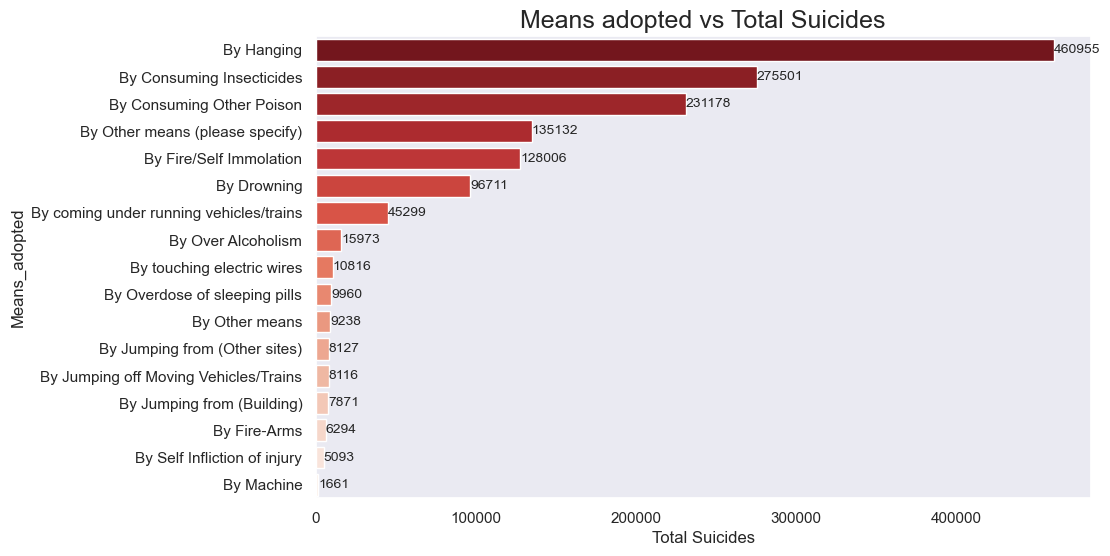

<Figure size 640x480 with 0 Axes>

In [62]:
plt.figure(figsize=(10,6))
temp = df_means[['Type','Total']].groupby(['Type']).sum().sort_values('Total',ascending=False)
c1=sns.barplot(y=temp.index,x=temp.Total,palette="Reds_r")
c1.bar_label(c1.containers[0],fontsize=10)
plt.title('Means adopted vs Total Suicides',fontsize=18)
plt.ylabel('Means_adopted')
plt.xlabel('Total Suicides')
plt.show()
plt.savefig("Meansadopt.png")

# Inference:

Top methods by which people suicide include by Hanging , by consuming insecticides or by consuming other poison.

### By hanging:

In [63]:
df_means_hang = df_means[df_means.Type=='By Hanging']
df_means_hang.head()

State  Year      Type_code        Type  Gender Age_group  Total
277  A & N Islands  2001  Means_adopted  By Hanging  Female      0-14      2
307  A & N Islands  2001  Means_adopted  By Hanging    Male      0-14      2
316  A & N Islands  2001  Means_adopted  By Hanging  Female     15-29     20
337  A & N Islands  2001  Means_adopted  By Hanging    Male     15-29     20
352  A & N Islands  2001  Means_adopted  By Hanging  Female     30-44      7

### Gender-wise suicide by hanging

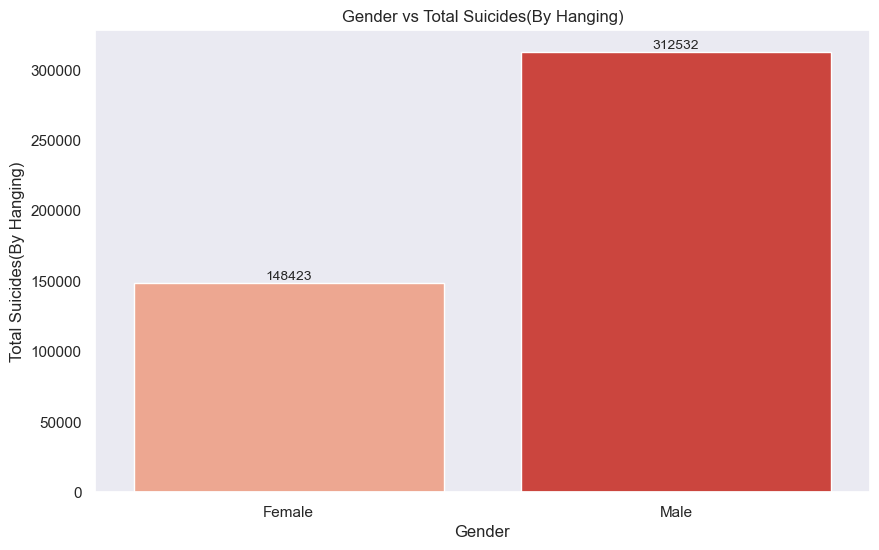

In [64]:
temp = df_means_hang[['Gender','Total']].groupby(['Gender']).sum()
plt.figure(figsize=(10,6))
c1=sns.barplot(x=temp.index,y=temp.Total,palette="Reds")
c1.bar_label(c1.containers[0],fontsize=10)
plt.title('Gender vs Total Suicides(By Hanging)')
plt.xlabel('Gender')
plt.ylabel('Total Suicides(By Hanging)')
plt.show()

# Inference:

More men tend to hang themselves when compared to women.

# Age-group wise suicide rates by Hanging:

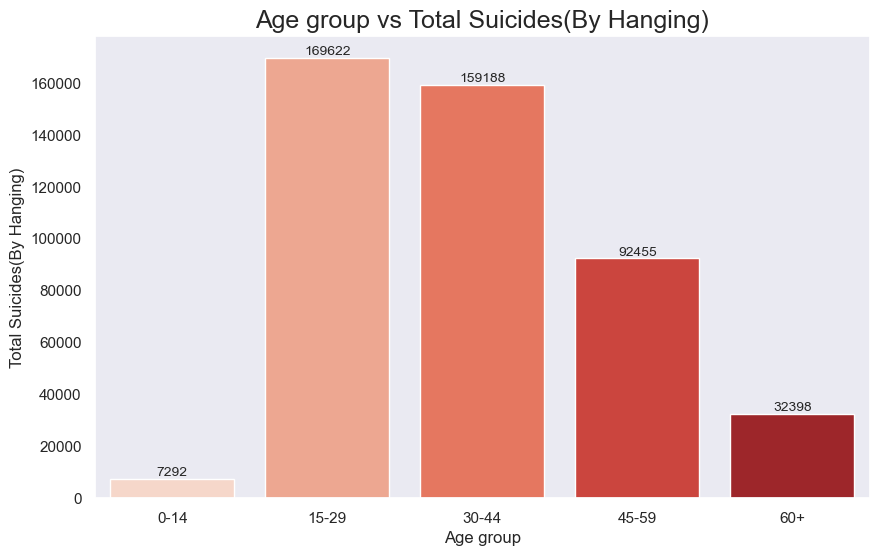

<Figure size 640x480 with 0 Axes>

In [65]:
temp = df_means_hang[['Age_group','Total']].groupby(['Age_group']).sum()
plt.figure(figsize=(10,6))
c1= sns.barplot(x=temp.index,y=temp.Total,palette='Reds')
c1.bar_label(c1.containers[0],fontsize=10)
plt.title('Age group vs Total Suicides(By Hanging)',fontsize=18)
plt.xlabel('Age group')
plt.ylabel('Total Suicides(By Hanging)')
plt.show()
plt.savefig("hanging_agegrp.png")

### State wise suicide rates by Hanging

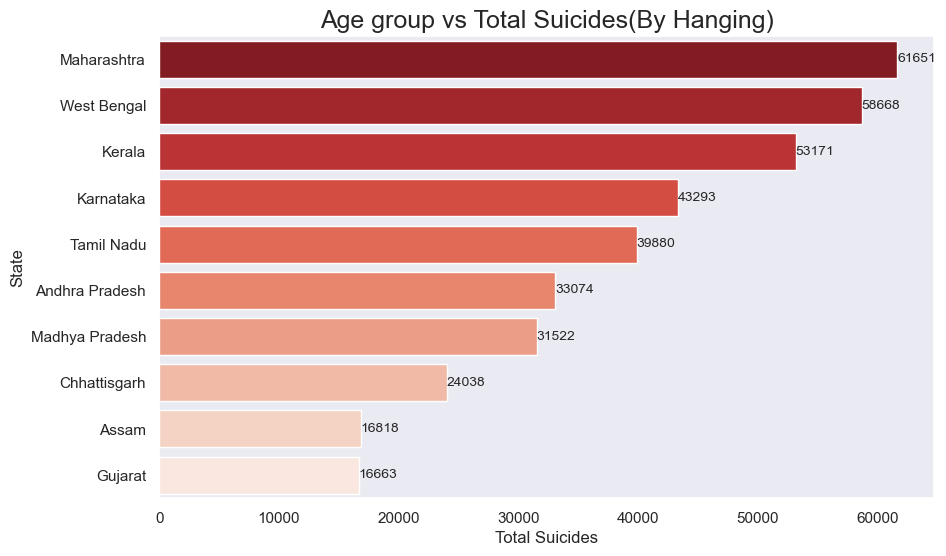

<Figure size 640x480 with 0 Axes>

In [66]:
temp = df_means_hang[['State','Total']].groupby(['State']).sum().sort_values('Total',ascending=False).head(10)
plt.figure(figsize=(10,6))
c1= sns.barplot(y=temp.index,x=temp.Total,palette='Reds_r')
c1.bar_label(c1.containers[0],fontsize=10)
plt.title('Age group vs Total Suicides(By Hanging)',fontsize=18)
plt.xlabel('Total Suicides')
plt.ylabel('State')
plt.show()
plt.savefig("hanging_state.png")

# Inference:

People in Maharastra , WestBengal and Kerala mostly prefer to commit suicide by hanging

### By consuming insecticides:

In [67]:
df_means_insec = df_means[df_means.Type=='By Consuming Insecticides']
df_means_insec.head()

State  Year      Type_code                       Type  Gender  \
276  A & N Islands  2001  Means_adopted  By Consuming Insecticides  Female   
296  A & N Islands  2001  Means_adopted  By Consuming Insecticides    Male   
318  A & N Islands  2001  Means_adopted  By Consuming Insecticides  Female   
338  A & N Islands  2001  Means_adopted  By Consuming Insecticides    Male   
344  A & N Islands  2001  Means_adopted  By Consuming Insecticides  Female   

    Age_group  Total  
276      0-14      0  
296      0-14      0  
318     15-29      0  
338     15-29      0  
344     30-44      0

### Gender-wise suicide by consuming insecticides:

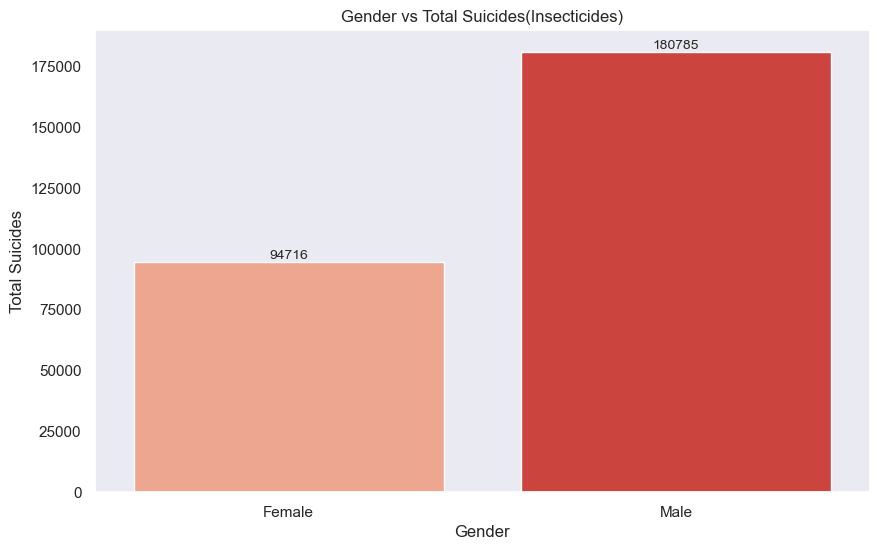

In [69]:
temp = df_means_insec[['Gender','Total']].groupby(['Gender']).sum()
plt.figure(figsize=(10,6))
c1=sns.barplot(x=temp.index,y=temp.Total,palette="Reds")
c1.bar_label(c1.containers[0],fontsize=10)
plt.title('Gender vs Total Suicides(Insecticides)')
plt.xlabel('Gender')
plt.ylabel('Total Suicides')
plt.show()

## Age-group wise suicide rates by consuming insecticides:

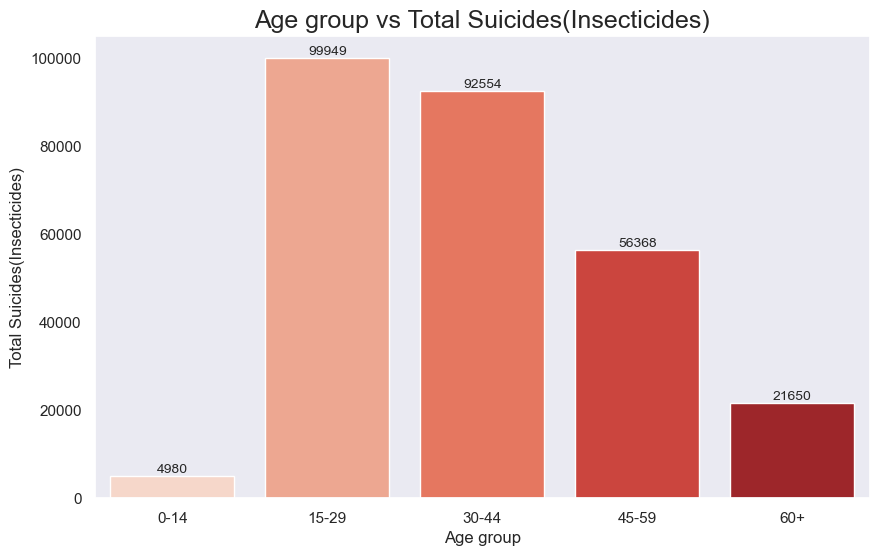

In [70]:
temp = df_means_insec[['Age_group','Total']].groupby(['Age_group']).sum()
plt.figure(figsize=(10,6))
c1= sns.barplot(x=temp.index,y=temp.Total,palette='Reds')
c1.bar_label(c1.containers[0],fontsize=10)
plt.title('Age group vs Total Suicides(Insecticides)',fontsize=18)
plt.xlabel('Age group')
plt.ylabel('Total Suicides(Insecticides)')
plt.savefig("insecticide_agegrp.png")
plt.show()


## State wise suicide rates by consuming insecticides:

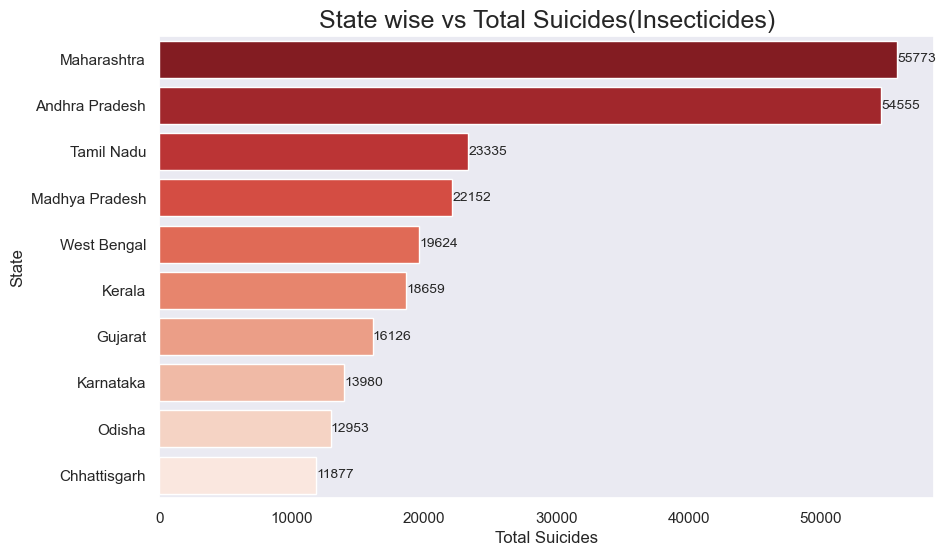

<Figure size 640x480 with 0 Axes>

In [71]:
temp = df_means_insec[['State','Total']].groupby(['State']).sum().sort_values('Total',ascending=False).head(10)
plt.figure(figsize=(10,6))
c1= sns.barplot(y=temp.index,x=temp.Total,palette='Reds_r')
c1.bar_label(c1.containers[0],fontsize=10)
plt.title('State wise vs Total Suicides(Insecticides)',fontsize=18)
plt.xlabel('Total Suicides')
plt.ylabel('State')
plt.show()
plt.savefig("insecticide_state.png")

## Inference:

Maharastra and Andra Pradesh have high rates of suicides due to consumption of insecticides